Entropic Coding and Compression
===============================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour studies source coding using entropic coders (Huffman and arithmetic).

You need to install the package _ape_

In [1]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
options(warn=-1) # turns off warnings, to turn on: "options(warn=0)"

library(Matrix)
library(stringr)
library(ape)

# Importing the libraries
for (f in list.files(path="nt_toolbox/toolbox_general/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_general/", f, sep=""))
}
for (f in list.files(path="nt_toolbox/toolbox_signal/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_signal/", f, sep=""))
}


Attaching package: ‘pracma’

The following objects are masked _by_ ‘.GlobalEnv’:

    circshift, fftshift, grad, ifftshift

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



Source Coding and Entropy
-------------------------
Entropic coding converts a vector $x$ of integers into a binary stream
$y$. Entropic coding exploits the
redundancies in the statistical distribution of the entries of $x$ to
reduce as much as possible the size of $y$. The lower bound for the
number of bits $p$ of $y$ is the Shannon bound :

$$p=-\sum_ih(i)\log_2(h(i))$$

where $h(i)$ is the probability of apparition of symbol $i$ in $x$.

Fist we generate a simple binary signal $x$ so that $0$ has a probability $p$
to appear in $x$.

Probability of 0.

In [2]:
p = 0.1

Size.


In [3]:
n = 512

Signal, should be with token 1,2.

In [4]:
x = ceiling(runif(n, 0, 1) > p ) +1

One can check the probabilities by computing the empirical histogram.

In [5]:
h = c(sum(x==1), sum(x==2))
h = h/sum(h)

print(paste("Empirical p =" , h[1]))

[1] "Empirical p = 0.103515625"


We can compute the entropy of the distribution represented as a vector $h$ of proability that should sum to 1.
We take a max to avoid problems with null probabilties.

In [6]:
e = - sum(h*log2(c(max(h[1],1e-20), max(h[2],1e-20))))
print(paste("Entropy = ", e))

[1] "Entropy =  0.480041813049243"


Huffman Coding
--------------
A Hufman code $C$ associates to each symbol $i$ in $\{1,...,m\}$ a binary code $C_i$
whose length is as close as possible to the optimal bound
$-\log_2\left(h(i)\right)$, where $h(i)$ is the probability of apparition of the
symbol $i$.

We select a set of proabilities.

In [7]:
h = c(.1, .15, .4, .15, .2)

The tree $T$ contains the codes and is generated by an iterative algorithm.
The initial "tree" is a collection of empty trees, pointing to the symbols numbers.

In [8]:
m = length(h)
T = list(list())

We build iteratively the Huffman tree
by grouping together the two erees that have the smallest probabilities.
The merged tree has a probability which is the sum of the two selected
probabilities.

Initial probability.

In [9]:
#we use the symbols i = 1,2,3,4,5 (as strings) with the associated probabilities h(i)

for (i in (1:m))
{
    T[[i]] = list(toString(i), h[i])
    
 }


Iterative merging of the leading probabilities.

In [10]:
while (length(T)>=2)
{
    T = T[order(sapply(T,'[[',2))]
    q = as.numeric(T[[1]][2])+as.numeric(T[[2]][2])
    t = T[1:2]
    T = T[-(1:2)]
    T[[length(T)+1]] = list(t,q)
}

We trim the computed tree by removing the probabilities.

In [11]:
trim = function(T)
{
    T0 = T[[1]][1]
    if (typeof(T0[[1]][1]) == 'character')
    {
        return (T0)
    }
    else
    {
        return (list(trim(T0[[1]][1]),trim(T0[[1]][2])))
    }
}

K = list()
K[[1]] = list(trim(T)[[1]][[1]][1],trim(T)[[2]])
T = K 

We display T 

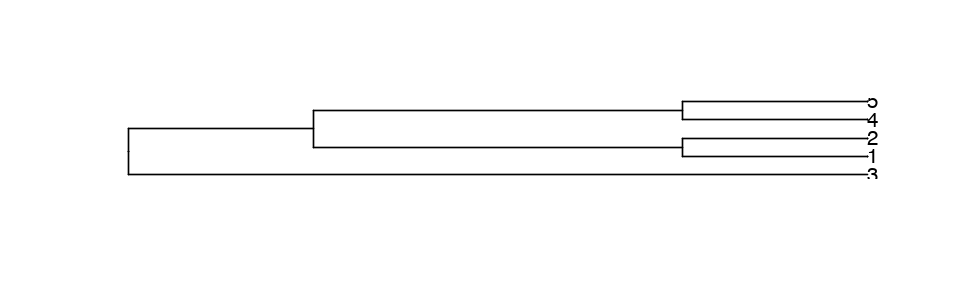

In [12]:
# flatten list
x2 = paste0(lapply(T, function(y) paste0("(", paste0(y, collapse = ","), ")")), collapse = ",")

# remove unwanted characters
x2 = gsub('\"|c|list| ', "", x2)
x2 = paste0("(", x2, ");")

# remove brackets from single term list object
x3 = str_replace_all(x2, "\\([a-z]*\\)", function(x) gsub("^\\(|\\)$", "", x))

# plot
plot(read.tree(text = x3), color="blue")

Once the tree $T$ is computed, one can compute the code $C_{i}$
associated to each symbol $i$. This requires to perform a deep first
search in the tree and stop at each node.

In [13]:
codes = list()
c = compute_huffcode(h)
for (i in (1:length(h)))
{
    codes[[toString(i)]] = c[i]
}

Display the code.

In [14]:
for (e in (1:length(codes)))
{
    print(paste("Code of token", e, "=", codes[[toString(e)]]))
}

[1] "Code of token 1 = 100"
[1] "Code of token 2 = 110"
[1] "Code of token 3 = 0"
[1] "Code of token 4 = 101"
[1] "Code of token 5 = 111"


We draw a vector $x$ according to the distribution $h$.

Size of the signal.

In [15]:
n = 1024

Randomization.

In [16]:
rand_discr = function (p, m)
{
      #  rand_discr - discrete random generator 
        
      #    y = rand_discr(p, n);
        
     #    y is a random vector of length n drawn from 
     #     a variable X such that
     #        p(i) = Prob( X=i )
    p = p/sum(p)
    n = length(p)
    coin = runif(m, 0, 1)
    cumprob = c(0,cumsum(p))
    sample = matrix(0, nrow=1, ncol=m)

    for (j in (1:n))
    {
        ind = c((coin > cumprob[j]) & (coin <= cumprob[j+1]))
        sample[ind] = j
    }
    return (sample)
}

x = rand_discr(h, n)

__Exercise 1__

Implement the coding of the vector $x$ to obtain a binary vector $y$, which corresponds to replacing each sybmol $x(i)$ by the code $C_{x(i)}$.

In [17]:
source("nt_solutions/coding_2_entropic/exo1.R")

In [18]:
## Insert your code here.

Compare the length of the code with the entropy bound.

In [19]:
e = - sum(h*log2(c(max(h[1],1e-20),max(h[2],1e-20),max(h[3],1e-20),max(h[4],1e-20),max(h[5],1e-20))))
print(paste("Entropy bound = ", n*e))
print(paste("Huffman code = ", nchar(y)))

[1] "Entropy bound =  2197.95388894312"
[1] "Huffman code =  2274"


Decoding is more complicated, since it requires to iteratively parse the tree $T$.

Initial empty decoded stream.

In [20]:
x1 = c()

Perform decoding.

In [21]:
T0 = K
for (e in strsplit(y,split=''))
{
    if (e == '0')
    {
        T0 = T0[[1]]
    } 
    else
    {
        T0 = T0[[1]][[2]]
    }
    if (typeof(T0) == 'character')
    {
        i = i+1
        x1 = c(x1,T0)
        T0 = T
    }
}

We test if the decoding is correct.

In [22]:
err = norm(x - as.double(x1))
print(paste("Error (should be zero) : ", err))

[1] "Error (should be zero) :  0"


Huffman Block Coding
--------------------
A Huffman coder is inefficient because it can distribute only an integer
number of bit per symbol. In particular, distribution where one of the
symbol has a large probability are not well coded using a Huffman code.
This can be aleviated by replacing the set of $m$ symbols by $m^q$
symbols obtained by packing the symbols by blocks of $q$ (here we use $m=2$ for a binary alphabet). This breaks
symbols with large probability into many symbols with smaller proablity,
thus approaching the Shannon entropy bound.


Generate a binary vector with a high probability of having 1, so that the
Huffman code is not very efficient (far from Shanon bound).

Proability of having 0.

In [23]:
t = .12

Probability distriution.

In [24]:
h = c(t, 1-t)

Generate signal.

In [25]:
n = 4096 * 2
x = (runif(n, 0, 1) >t) +1

For block of length $q=3$, create a new vector by coding each block
with an integer in $\{1,...,m^q=2^3\}$. The new length of the vector is
$n_1/q$ where $n_1=\lceil n/q\rceil q$.

Block size.

In [26]:
q = 3

Maximum token value.

In [27]:
m = 2

New size.

In [28]:
n1 = (floor(n/q)+1)*q

New vector.

In [29]:
x1 = matrix(0, nrow=1, ncol=n1)
x1[1:length(x)] = x
x1[length(x):length(x1)] = 1
x1 = x1 - 1
x2 = c()

for (i in seq(1,n1,by=q))
{
    mult = m**c(1:q-1)
    x2 = c(x2, sum(x1[i:(i+q)]*mult))
}

We generate the probability table $H$ of $x_1$ that represents the probability
of each new block symbols in $\{1,...,m^q\}$.

In [30]:
H = h
for (i in (1:(q-1)))
{
    Hold = H
    H = c()
    for (j in (1:length(h)))
    {
        H = c(H, h[j]*Hold)
    }
}


A simpler way to compute this block-histogram is to use the Kronecker product.

In [31]:
H = h
for (i in (1:(q-1)))
{
    H = kronecker(H,h)
}
H

[1] 0.001728 0.012672 0.012672 0.092928 0.012672 0.092928 0.092928 0.681472

__Exercise 2__

For various values of block size $k$, Perform the Huffman coding and compute the length of the code.
Compare with the entropy lower bound.

[1] "Entropy Bound = 0.529360865287364"
[1] "---"
[1] "Huffman(block size =  2 = 0.144287109375"
[1] "Huffman(block size =  3 = 0.0299072265625"
[1] "Huffman(block size =  4 = 0.004638671875"
[1] "Huffman(block size =  5 = 0.0013427734375"
[1] "Huffman(block size =  6 = 0"
[1] "Huffman(block size =  7 = 0"
[1] "Huffman(block size =  8 = 0"
[1] "Huffman(block size =  9 = 0"
[1] "Huffman(block size =  10 = 0"
[1] "Huffman(block size =  11 = 0"


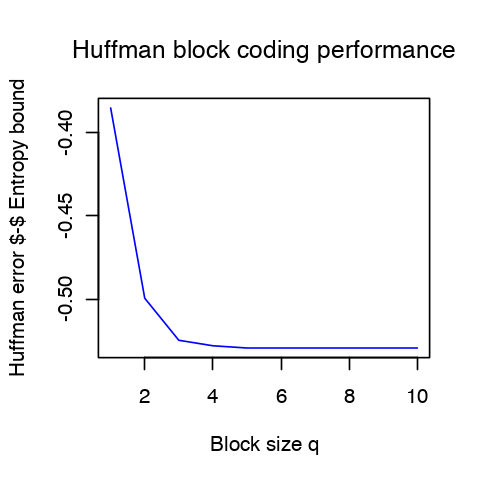

In [32]:
source("nt_solutions/coding_2_entropic/exo2.R")

In [33]:
## Insert your code here.

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>